In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as sm
from statsmodels.iolib.summary2 import summary_col

In [4]:
df = pd.read_csv('comb_df.csv', index_col=0)
df.rename(columns={'3M': 'r3M', '1Y': 'r1Y', '2Y': 'r2Y', '3Y': 'r3Y', '5Y': 'r5Y', 
           '7Y': 'r7Y', '10Y': 'r10Y', '20Y': 'r20Y', '30Y': 'r30Y', 
                   'DJIA_Adj Close': 'DJIA_Adj_Close', 'NYSE_Adj Close': 'NYSE_Adj_Close',
                  'SP500_Adj Close': 'SP500_Adj_Close'}, inplace=True)
df['NYSE_return'] = df.NYSE_Adj_Close.pct_change()
df['SP500_return'] = df.SP500_Adj_Close.pct_change()
df['DJIA_return'] = df.DJIA_Adj_Close.pct_change()
df['Spread'] = df['r10Y'] - df['r3M']
df = df[['Spread', 'USRECQ', 'M1SL', 'M2SL', 'TB3MS', 'TB6MS', 'GDPC1', 'r3M', 'r1Y',
       'r2Y', 'r3Y', 'r5Y', 'r7Y', 'r10Y', 'r20Y', 'r30Y', 'NYSE_return', 'SP500_return', 'DJIA_return']]

In [5]:
df_yield_curve = df[['r3M', 'r1Y', 'r2Y', 'r3Y','r5Y', 'r7Y','r10Y', 'r20Y', 'r30Y']].dropna()
pca = PCA(n_components=3)
pca.fit(df_yield_curve.iloc[:60])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

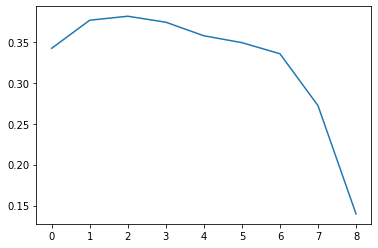

In [6]:
plt.plot(pca.components_[0])

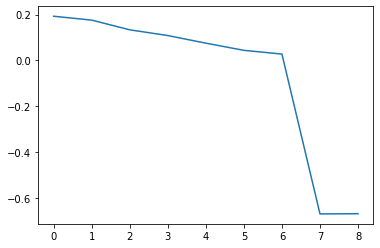

In [7]:
plt.plot(pca.components_[1])

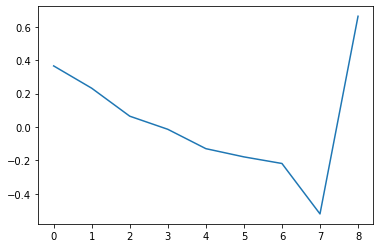

In [8]:
plt.plot(pca.components_[2])

In [9]:
pca_yc = pd.DataFrame(pca.transform(df_yield_curve), columns=['pca1', 'pca2', 'pca3'], index=df_yield_curve.index)
new_df = df.loc[df_yield_curve.index]
new_df = pd.concat([new_df, pca_yc], axis=1)
new_df

,Spread,USRECQ,M1SL,M2SL,TB3MS,TB6MS,GDPC1,r3M,r1Y,r2Y,...,r7Y,r10Y,r20Y,r30Y,NYSE_return,SP500_return,DJIA_return,pca1,pca2,pca3
DATE,,,,,,,,,,,,,,,,,,,,,
1982-03-31,0.55,1.0,441.9,1774.5,12.813333,13.070000,6794.878,13.31,13.95,14.19,...,13.93,13.86,9.08,8.50,NaN,NaN,NaN,14.990802,5.900528,0.761861
1982-06-30,1.22,1.0,446.7,1815.4,12.420000,12.553333,6825.876,13.08,14.07,14.47,...,14.47,14.30,8.91,8.47,NaN,NaN,NaN,15.641535,6.156472,0.535654
1982-09-30,4.15,1.0,451.4,1845.2,9.316667,10.376667,6799.781,8.19,10.85,11.78,...,12.36,12.34,9.21,8.88,NaN,NaN,NaN,8.779110,3.235709,-0.930577
1982-12-31,2.34,0.0,471.5,1883.7,7.906667,8.263333,6802.497,8.20,8.91,9.66,...,10.49,10.54,10.18,9.03,NaN,NaN,NaN,4.741913,1.345058,-0.895326
1983-03-31,1.85,0.0,484.3,1996.8,8.106667,8.176667,6892.144,8.66,9.04,9.66,...,10.31,10.51,12.49,8.92,NaN,NaN,NaN,5.423553,-0.038894,-1.915925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31,0.29,1.0,3947.4,15251.2,1.576667,1.570000,19253.959,1.57,1.55,1.61,...,1.79,1.86,2.16,2.30,0.044731,0.044731,0.044731,-18.578935,5.393850,-1.140065
2020-03-31,0.57,1.0,4003.1,15446.9,1.110000,1.093333,19010.848,0.30,0.33,0.45,...,0.78,0.87,1.26,1.46,-0.138388,-0.138388,-0.138388,-21.774596,5.665847,-1.494387
2020-06-30,0.57,1.0,5035.3,17868.6,0.143333,0.166667,17302.511,0.16,0.18,0.19,...,0.55,0.73,1.27,1.49,0.085543,0.085543,0.085543,-22.292585,5.487724,-1.474024


In [10]:
df_temp = new_df.iloc[60:].copy()
tvalues_pca1 = []
tvalues_pca2 = []
tvalues_pca3 = []
prsquareds = []
for i in range(1, 9):
    df_temp['y'] = df_temp.USRECQ.shift(-i)
    logitfit = sm.logit(formula = 'y ~ pca1 + pca2 + pca3', data = df_temp).fit(disp=0)
    tvalues_pca1.append(logitfit.tvalues['pca1'])
    tvalues_pca2.append(logitfit.tvalues['pca2'])
    tvalues_pca3.append(logitfit.tvalues['pca3'])
    prsquareds.append(logitfit.prsquared)

In [11]:
pd.DataFrame([tvalues_pca1, tvalues_pca2, tvalues_pca3, prsquareds], 
             index=['tvalues_pca1', 'tvalues_pca2', 'tvalues_pca3','R_squared'], 
             columns=['lag 1', 'lag 2', 'lag 3', 'lag 4', 'lag 5', 'lag 6', 'lag 7', 'lag 8'])



,lag 1,lag 2,lag 3,lag 4,lag 5,lag 6,lag 7,lag 8
tvalues_pca1,-0.258801,0.216178,0.885292,1.708276,2.499676,2.814082,2.977296,2.612142
tvalues_pca2,1.130037,1.885999,2.695728,3.170342,3.317562,3.171312,3.250441,3.411204
tvalues_pca3,0.714593,1.136181,1.244859,0.941635,0.420448,-0.887282,-1.577542,-0.333375
R_squared,0.038305,0.114110,0.230979,0.346558,0.505567,0.617842,0.644725,0.490292
